In [13]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 5
Problem 1
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 5\nProblem 1\n'

In [14]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
x = [[35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]]
y = [[0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]]
X = torch.tensor(x)
Y = torch.tensor(y)
w = torch.ones((2))
b = torch.zeros(())

In [16]:
def model(t_u, w, b):
    return w[1].item()*(t_u**2) + w[0].item()*t_u + b

def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

In [17]:
t_p = model(X, w, b)
loss = loss_fn(t_p, Y)
print("Predicted: {}\nAverage Loss: {}".format(t_p, loss))

Predicted: tensor([[1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
         1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600]])
Average Loss: 11709471.0


In [18]:
def dloss_fn(t_p, Y):
    return 2* (t_p - Y) / t_p.size(0)

def dw_fn(X, w, b):
    return X

def db_fn(X, w, b):
    return 1

In [19]:
def grad_fn(X, Y, t_p, w, b):
    dtp = dloss_fn(t_p, Y)
    dw = dtp * dw_fn(X, w, b)
    db = dtp * db_fn(X, w, b)
    return torch.stack([dw.sum(), db.sum()])

In [20]:
def train(epochs, l_r, w, b, X, Y):
    for epoch in range(1, epochs + 1):
        t_p = model(X, w, b)
        loss = loss_fn(t_p, Y)
        grad = grad_fn(X, Y, t_p, w, b)
        
        w = w - l_r * grad[0]
        b = b - l_r * grad[1]
        
        #output won't fit if I do every 500
        if epoch % 1000 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return w, b

In [21]:
t_n = .1 * X
l_r = [.1, .01, .001, .0001]


for rate in l_r:
    print("Learning rate: {}".format(rate))
    train(5000, rate, w, b, t_n, Y)
    print()

Learning rate: 0.1
Epoch 1000, Loss nan
Epoch 2000, Loss nan
Epoch 3000, Loss nan
Epoch 4000, Loss nan
Epoch 5000, Loss nan

Learning rate: 0.01
Epoch 1000, Loss nan
Epoch 2000, Loss nan
Epoch 3000, Loss nan
Epoch 4000, Loss nan
Epoch 5000, Loss nan

Learning rate: 0.001
Epoch 1000, Loss nan
Epoch 2000, Loss nan
Epoch 3000, Loss nan
Epoch 4000, Loss nan
Epoch 5000, Loss nan

Learning rate: 0.0001
Epoch 1000, Loss 6.401288
Epoch 2000, Loss 4.532039
Epoch 3000, Loss 3.537531
Epoch 4000, Loss 3.013071
Epoch 5000, Loss 2.740008



In [22]:
#Best model parameters I could get
w, b = train(5000, .00021, w, b, t_n, Y)
t_p = model(t_n, w, b)
print("Predicted: {}\nAverage Loss: {}".format(t_p, loss))

Epoch 1000, Loss 4.402865
Epoch 2000, Loss 2.943319
Epoch 3000, Loss 2.574324
Epoch 4000, Loss 2.491370
Epoch 5000, Loss 2.478732
Predicted: tensor([[ 1.8996, 11.5968, 12.9455, 29.7540, 11.8278,  7.7998,  1.2226, -2.5336,
          7.5463, 14.2823, 19.5289]])
Average Loss: 11709471.0


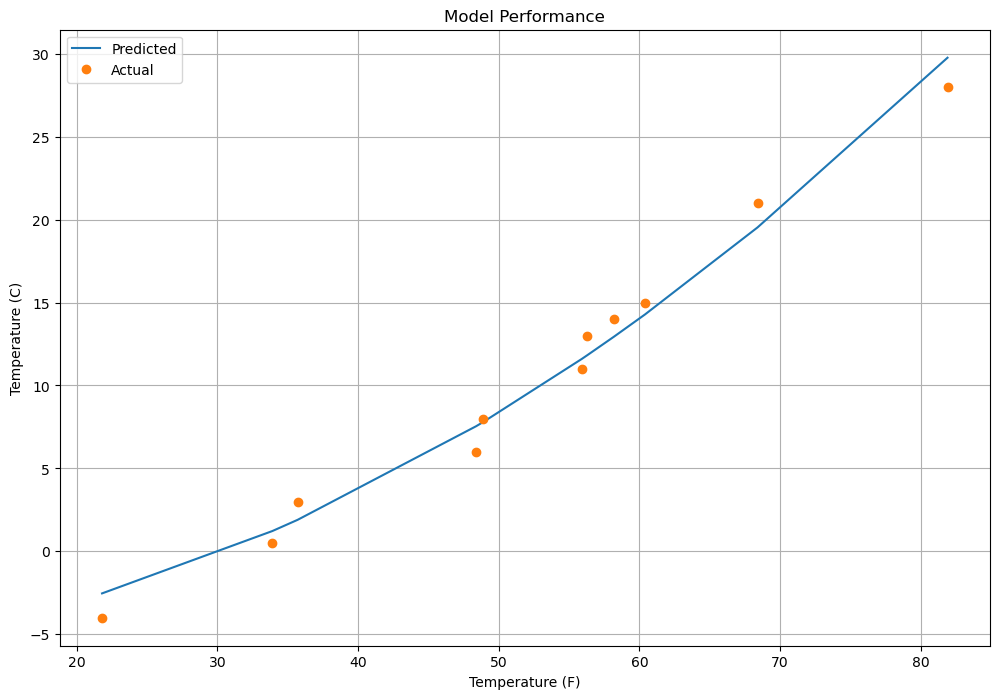

In [23]:
plt.rcParams["figure.figsize"] = (12,8)
#fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (F)")
plt.ylabel("Temperature (C)")
plt.plot(np.sort(X[0].numpy()), np.sort(t_p[0].numpy()), label="Predicted")
plt.plot(np.sort(X[0].numpy()), np.sort(Y[0].numpy()), 'o', label="Actual")
plt.title("Model Performance")
plt.legend()
plt.grid()
